In [55]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn
from pickle import dump

In [8]:
df = pd.read_csv('GE.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-02-28,73.973457,74.800934,73.481651,74.558937,74.239235,8094767
1,2022-03-01,74.129585,74.988289,71.717407,72.076500,71.767448,8624333
2,2022-03-02,72.958626,74.121780,72.661980,73.505074,73.189888,5691227
3,2022-03-03,74.113976,74.395004,71.803276,72.170181,71.860725,5921935
4,2022-03-04,70.429352,70.632317,68.321625,69.586258,69.287880,10810103


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


In [10]:
train_dates = pd.to_datetime(df['Date'])
train_dates.head()

0   2022-02-28
1   2022-03-01
2   2022-03-02
3   2022-03-03
4   2022-03-04
Name: Date, dtype: datetime64[ns]

In [11]:
cols = list(df)[1:]
cols

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [12]:
df_for_training = df[cols].astype(float)
df_for_training

,Open,High,Low,Close,Adj Close,Volume
0,73.973457,74.800934,73.481651,74.558937,74.239235,8094767.0
1,74.129585,74.988289,71.717407,72.076500,71.767448,8624333.0
2,72.958626,74.121780,72.661980,73.505074,73.189888,5691227.0
3,74.113976,74.395004,71.803276,72.170181,71.860725,5921935.0
4,70.429352,70.632317,68.321625,69.586258,69.287880,10810103.0
...,...,...,...,...,...,...
245,83.589996,83.820000,82.230003,83.040001,83.040001,4424200.0
246,82.139999,83.379997,81.809998,82.260002,82.260002,4071800.0
247,82.160004,84.330002,82.099998,83.190002,83.190002,8642500.0
248,83.489998,84.410004,81.900002,82.940002,82.940002,8077200.0


In [13]:
df.head(15)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-02-28,73.973457,74.800934,73.481651,74.558937,74.239235,8094767
1,2022-03-01,74.129585,74.988289,71.717407,72.076500,71.767448,8624333
2,2022-03-02,72.958626,74.121780,72.661980,73.505074,73.189888,5691227
3,2022-03-03,74.113976,74.395004,71.803276,72.170181,71.860725,5921935
4,2022-03-04,70.429352,70.632317,68.321625,69.586258,69.287880,10810103
5,2022-03-07,69.219360,69.640907,66.580795,66.651054,66.424881,9120848
6,2022-03-08,67.939110,70.608902,66.783760,68.813431,68.579926,8783945
7,2022-03-09,71.397346,72.591728,71.116318,71.233414,70.991684,8295500
8,2022-03-10,68.516785,71.506638,68.266975,71.295860,71.053925,10395956
9,2022-03-11,72.443405,73.083527,71.553474,72.037468,71.793015,9052058


In [56]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
# save the scaler
dump(scaler, open('scaler.pkl', 'wb'))
df_for_training_scale = scaler.transform(df_for_training)

In [15]:
df_for_training_scale[:14]

array([[ 1.09490555,  1.0795725 ,  1.13169243,  1.13348112,  1.11143225,
        -0.00147441],
       [ 1.1110054 ,  1.09873622,  0.94954313,  0.88025177,  0.85959804,
         0.16087627],
       [ 0.99025663,  1.01010482,  1.04706553,  1.02597827,  1.00452115,
        -0.73833509],
       [ 1.10939581,  1.0380517 ,  0.95840868,  0.88980802,  0.86910142,
        -0.66760623],
       [ 0.72943902,  0.65318296,  0.59894577,  0.62622626,  0.60697107,
         0.83097453],
       [ 0.60466518,  0.55177598,  0.41921385,  0.32681089,  0.31527882,
         0.31309441],
       [ 0.47264637,  0.65078794,  0.44016897,  0.54739144,  0.53484226,
         0.20980901],
       [ 0.82925813,  0.85360251,  0.88748373,  0.79424995,  0.78056051,
         0.06006492],
       [ 0.53221596,  0.74261341,  0.59330343,  0.80061996,  0.78690184,
         0.7040082 ],
       [ 0.93712727,  0.90390647,  0.93261788,  0.87627018,  0.86220289,
         0.29200524],
       [ 0.90814768,  0.93345075,  0.95518547,  0.

In [16]:
trainX = []
trainY = []
n_future = 1
n_past = 14
             #  14           250- 1 + 1
for i in range(n_past, len(df_for_training_scale)-n_future + 1):
    trainX.append(df_for_training_scale[i-n_past:i,1:])
    trainY.append(df_for_training_scale[i+n_future-1:i+n_future,0])

In [17]:
df.head(15)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-02-28,73.973457,74.800934,73.481651,74.558937,74.239235,8094767
1,2022-03-01,74.129585,74.988289,71.717407,72.076500,71.767448,8624333
2,2022-03-02,72.958626,74.121780,72.661980,73.505074,73.189888,5691227
3,2022-03-03,74.113976,74.395004,71.803276,72.170181,71.860725,5921935
4,2022-03-04,70.429352,70.632317,68.321625,69.586258,69.287880,10810103
5,2022-03-07,69.219360,69.640907,66.580795,66.651054,66.424881,9120848
6,2022-03-08,67.939110,70.608902,66.783760,68.813431,68.579926,8783945
7,2022-03-09,71.397346,72.591728,71.116318,71.233414,70.991684,8295500
8,2022-03-10,68.516785,71.506638,68.266975,71.295860,71.053925,10395956
9,2022-03-11,72.443405,73.083527,71.553474,72.037468,71.793015,9052058


In [18]:
trainX[0]

array([[ 1.0795725 ,  1.13169243,  1.13348112,  1.11143225, -0.00147441],
       [ 1.09873622,  0.94954313,  0.88025177,  0.85959804,  0.16087627],
       [ 1.01010482,  1.04706553,  1.02597827,  1.00452115, -0.73833509],
       [ 1.0380517 ,  0.95840868,  0.88980802,  0.86910142, -0.66760623],
       [ 0.65318296,  0.59894577,  0.62622626,  0.60697107,  0.83097453],
       [ 0.55177598,  0.41921385,  0.32681089,  0.31527882,  0.31309441],
       [ 0.65078794,  0.44016897,  0.54739144,  0.53484226,  0.20980901],
       [ 0.85360251,  0.88748373,  0.79424995,  0.78056051,  0.06006492],
       [ 0.74261341,  0.59330343,  0.80061996,  0.78690184,  0.7040082 ],
       [ 0.90390647,  0.93261788,  0.87627018,  0.86220289,  0.29200524],
       [ 0.93345075,  0.95518547,  0.88980802,  0.8756783 , -0.10966866],
       [ 0.89911572,  0.90037913,  0.88184484,  0.86775208, -0.47929708],
       [ 1.0492306 ,  1.01966308,  1.06897949,  1.05402327, -0.29224427],
       [ 1.05961044,  1.06560317,  1.1

In [19]:
trainY[0]

array([1.16172022])

In [20]:
len(trainX)

236

In [21]:
len(trainY)

236

In [22]:
trainX, trainY = np.array(trainX), np.array(trainY)

In [23]:
trainX.shape

(236, 14, 5)

In [24]:
trainY.shape

(236, 1)

In [25]:
trainX[:14]

array([[[ 1.0795725 ,  1.13169243,  1.13348112,  1.11143225,
         -0.00147441],
        [ 1.09873622,  0.94954313,  0.88025177,  0.85959804,
          0.16087627],
        [ 1.01010482,  1.04706553,  1.02597827,  1.00452115,
         -0.73833509],
        [ 1.0380517 ,  0.95840868,  0.88980802,  0.86910142,
         -0.66760623],
        [ 0.65318296,  0.59894577,  0.62622626,  0.60697107,
          0.83097453],
        [ 0.55177598,  0.41921385,  0.32681089,  0.31527882,
          0.31309441],
        [ 0.65078794,  0.44016897,  0.54739144,  0.53484226,
          0.20980901],
        [ 0.85360251,  0.88748373,  0.79424995,  0.78056051,
          0.06006492],
        [ 0.74261341,  0.59330343,  0.80061996,  0.78690184,
          0.7040082 ],
        [ 0.90390647,  0.93261788,  0.87627018,  0.86220289,
          0.29200524],
        [ 0.93345075,  0.95518547,  0.88980802,  0.8756783 ,
         -0.10966866],
        [ 0.89911572,  0.90037913,  0.88184484,  0.86775208,
         -0.479

In [26]:
model = Sequential()
model.add(LSTM(64,activation='relu', input_shape=(trainX.shape[1],trainX.shape[2]), return_sequences=True))
model.add(LSTM(32,activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 64)            17920     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 30,369
Trainable params: 30,369
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = model.fit(trainX,trainY,epochs=100,batch_size=16,validation_split=0.1)

Epoch 1/100
14/14 [==============================] - 5s 71ms/step - loss: 0.4733 - val_loss: 2.8063
Epoch 2/100
14/14 [==============================] - 0s 21ms/step - loss: 0.2325 - val_loss: 0.1769
Epoch 3/100
14/14 [==============================] - 0s 24ms/step - loss: 0.1465 - val_loss: 0.1309
Epoch 4/100
14/14 [==============================] - 0s 22ms/step - loss: 0.1220 - val_loss: 1.2719
Epoch 5/100
14/14 [==============================] - 0s 20ms/step - loss: 0.1010 - val_loss: 0.0358
Epoch 6/100
14/14 [==============================] - 0s 24ms/step - loss: 0.0996 - val_loss: 0.0509
Epoch 7/100
14/14 [==============================] - 0s 25ms/step - loss: 0.0740 - val_loss: 0.1316
Epoch 8/100
14/14 [==============================] - 0s 25ms/step - loss: 0.0779 - val_loss: 0.7235
Epoch 9/100
14/14 [==============================] - 0s 24ms/step - loss: 0.0653 - val_loss: 0.5132
Epoch 10/100
14/14 [==============================] - 0s 24ms/step - loss: 0.0549 - val_loss: 0.7000

14/14 [==============================] - 0s 24ms/step - loss: 0.0309 - val_loss: 0.1973
Epoch 83/100
14/14 [==============================] - 0s 25ms/step - loss: 0.0230 - val_loss: 0.1678
Epoch 84/100
14/14 [==============================] - 0s 26ms/step - loss: 0.0209 - val_loss: 0.3561
Epoch 85/100
14/14 [==============================] - 0s 26ms/step - loss: 0.0235 - val_loss: 0.0741
Epoch 86/100
14/14 [==============================] - 0s 26ms/step - loss: 0.0226 - val_loss: 0.1501
Epoch 87/100
14/14 [==============================] - 0s 26ms/step - loss: 0.0277 - val_loss: 0.0706
Epoch 88/100
14/14 [==============================] - 0s 24ms/step - loss: 0.0281 - val_loss: 0.0824
Epoch 89/100
14/14 [==============================] - 0s 25ms/step - loss: 0.0275 - val_loss: 0.1452
Epoch 90/100
14/14 [==============================] - 0s 26ms/step - loss: 0.0314 - val_loss: 0.2137
Epoch 91/100
14/14 [==============================] - 0s 25ms/step - loss: 0.0241 - val_loss: 0.1821
Epo

In [28]:
n_future = 7
forcast_period_dates = pd.date_range(list(train_dates)[-1],periods=n_future, freq='1d').tolist()

In [29]:
forcast_period_dates

[Timestamp('2023-02-24 00:00:00', freq='D'),
 Timestamp('2023-02-25 00:00:00', freq='D'),
 Timestamp('2023-02-26 00:00:00', freq='D'),
 Timestamp('2023-02-27 00:00:00', freq='D'),
 Timestamp('2023-02-28 00:00:00', freq='D'),
 Timestamp('2023-03-01 00:00:00', freq='D'),
 Timestamp('2023-03-02 00:00:00', freq='D')]

In [30]:
forcast = model.predict(trainX[-n_future:])

In [31]:
forcast

array([[1.5758536],
       [1.6254864],
       [1.5156672],
       [1.3824434],
       [1.3319674],
       [1.4282515],
       [1.4007783]], dtype=float32)

In [32]:
df_for_training.shape

(250, 6)

In [33]:
forecast_copies = np.repeat(forcast,df_for_training.shape[1],axis=-1)
y_pred_future = scaler.inverse_transform(forecast_copies)[:,0]

In [34]:
forecast_dates = []
for time_i in forcast_period_dates:
    forecast_dates.append(time_i.date())


In [35]:
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates),
                           'Open':y_pred_future})
df_forecast['Date'] = pd.to_datetime(df_forecast['Date'])

In [36]:
original = df[['Date','Open']]
original['Date'] = pd.to_datetime(original['Date'])

C:\Users\user\AppData\Local\Temp/ipykernel_12408/4168546087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date'] = pd.to_datetime(original['Date'])


In [37]:
original

,Date,Open
0,2022-02-28,73.973457
1,2022-03-01,74.129585
2,2022-03-02,72.958626
3,2022-03-03,74.113976
4,2022-03-04,70.429352
...,...,...
245,2023-02-17,83.589996
246,2023-02-21,82.139999
247,2023-02-22,82.160004
248,2023-02-23,83.489998


In [38]:
df_forecast

,Date,Open
0,2023-02-24,78.637444
1,2023-02-25,79.118752
2,2023-02-26,78.053787
3,2023-02-27,76.761848
4,2023-02-28,76.272362
5,2023-03-01,77.206070
6,2023-03-02,76.939651


In [39]:
import seaborn as sns

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Open'>

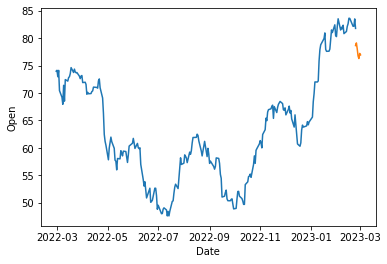

In [40]:
sns.lineplot(original['Date'], original['Open'])
sns.lineplot(df_forecast['Date'], df_forecast['Open'])

In [41]:
trainX[-7:]

array([[[ 1.77297362,  1.81706879,  1.8048045 ,  1.81450598,
         -0.48695344],
        [ 2.01948154,  1.89759976,  2.01800239,  2.02744282,
         -0.09518369],
        [ 1.89264758,  1.873853  ,  1.77318221,  1.78292241,
         -0.72739871],
        [ 1.70444247,  1.74995936,  1.73747938,  1.7472633 ,
         -0.37281628],
        [ 1.86400771,  1.80571174,  1.92517447,  1.93472857,
         -0.25362066],
        [ 2.02357307,  2.00084471,  2.09042823,  2.09977998,
          0.05929849],
        [ 1.98879626,  1.99258491,  1.88845136,  1.89805042,
         -0.71191677],
        [ 1.86093925,  1.93270263,  1.92823452,  1.93778487,
         -1.15574263],
        [ 1.85377936,  1.86043147,  1.90375282,  1.91333314,
         -1.0415135 ],
        [ 1.87730454,  1.93889784,  1.88845136,  1.89805042,
         -1.43849499],
        [ 1.880373  ,  1.85010708,  1.76910177,  1.77884697,
         -1.29931081],
        [ 1.74944752,  1.84597728,  1.82010596,  1.8297887 ,
         -1.413

In [42]:
import pickle

In [43]:
from keras.models import load_model
model.save('model.h5')
model_final = load_model('model.h5')

In [51]:
model_final.predict(trainX[-7:])

array([[1.5758536],
       [1.6254864],
       [1.5156672],
       [1.3824434],
       [1.3319674],
       [1.4282515],
       [1.4007783]], dtype=float32)

In [45]:
trainX[-7:]

array([[[ 1.77297362,  1.81706879,  1.8048045 ,  1.81450598,
         -0.48695344],
        [ 2.01948154,  1.89759976,  2.01800239,  2.02744282,
         -0.09518369],
        [ 1.89264758,  1.873853  ,  1.77318221,  1.78292241,
         -0.72739871],
        [ 1.70444247,  1.74995936,  1.73747938,  1.7472633 ,
         -0.37281628],
        [ 1.86400771,  1.80571174,  1.92517447,  1.93472857,
         -0.25362066],
        [ 2.02357307,  2.00084471,  2.09042823,  2.09977998,
          0.05929849],
        [ 1.98879626,  1.99258491,  1.88845136,  1.89805042,
         -0.71191677],
        [ 1.86093925,  1.93270263,  1.92823452,  1.93778487,
         -1.15574263],
        [ 1.85377936,  1.86043147,  1.90375282,  1.91333314,
         -1.0415135 ],
        [ 1.87730454,  1.93889784,  1.88845136,  1.89805042,
         -1.43849499],
        [ 1.880373  ,  1.85010708,  1.76910177,  1.77884697,
         -1.29931081],
        [ 1.74944752,  1.84597728,  1.82010596,  1.8297887 ,
         -1.413

In [46]:
type(trainX)

numpy.ndarray

In [48]:
type(trainX)

numpy.ndarray

In [59]:
np.save('data.npy', trainX)